IMPORTS

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

DATASET READING

In [18]:
df = pd.read_csv("insurance.txt",sep = ",")
df.insert(0,'0th_feature',1)

DATA VISUALIZATION

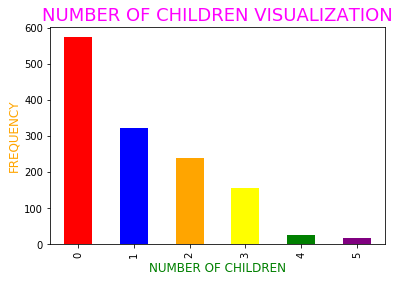

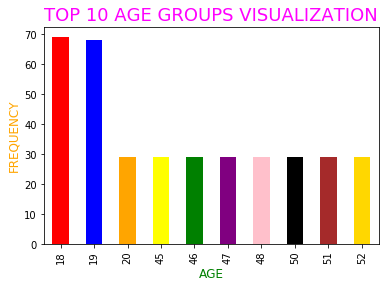

In [19]:
colormap = ['red','blue','orange','yellow','green','purple','pink','black','brown','gold']
plot1 = plt.figure(1)
df['children'].value_counts().sort_index().plot.bar(color = colormap)
plt.title('NUMBER OF CHILDREN VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('NUMBER OF CHILDREN',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plot2 = plt.figure(2)
df['age'].value_counts()[:10].sort_index().plot.bar(color = colormap)
plt.title('TOP 10 AGE GROUPS VISUALIZATION',fontsize = 18,color = 'magenta')
plt.xlabel('AGE',color = 'green',fontsize = 12)
plt.ylabel('FREQUENCY',color = 'orange',fontsize = 12)
plt.show()

DATA PREPROCESSING

In [20]:
def standardize(x,u,sigma):
  return (x-u)/sigma

In [21]:
def preprocessing(df):
  mean_age = df.mean()['age']
  age_variance =df.std()['age']
  mean_bmi = df.mean()['bmi']
  bmi_variance = df.std()['bmi']
  mean_children = df.mean()['children']
  children_variance = df.std()['children']
  mean_charges = df.mean()['charges']
  charges_variance = df.std()['charges']  
  df['age'] = df['age'].apply(lambda x : standardize(x,mean_age,age_variance)) 
  df['bmi'] = df['bmi'].apply(lambda x : standardize(x,mean_bmi,bmi_variance)) 
  df['children'] = df['children'].apply(lambda x : standardize(x,mean_children,children_variance)) 
  df['charges']  = df['charges'].apply(lambda x : standardize(x,mean_charges,charges_variance)) 
  return df    


FUNCTIONS

In [22]:
def error_value(w,X,y):
  return (np.sum((np.dot(X,w) - y)**2))/2

In [23]:
def stochastic_gradient_descent(w,X,y,alpha,printError):
  error = []
  for i in range(10):
    for j in range(len(X)):
      if printError == True:
        if j%500 == 0:
          print(error_value(w,X,y))
      item = X[j]
      output = y[j]
      if j%50 == 0:
        error.append(error_value(w,X,y))
      A = (item.transpose()).reshape(4,1)
      B = (item.dot(w) - output).reshape(1,1)
      dw = np.dot(A,B)
      w = w - alpha*dw
  return w,error 

In [24]:
def predict(parameters,X_test):
  return np.dot(X_test,parameters)

In [25]:
def RMSE(y_true,y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).mean())

TRAINING AND TESTING PHASES

In [26]:
train_errors = []
train_sum_of_squares = []
test_sum_of_squares = []
errors = []
weights_list = []
for k in range(20):
  #TRAINING PHASE
  df = df.sample(frac=1, random_state=k*100)
  df = df.reset_index(drop = True)
  df = preprocessing(df)
  train_size = int(0.7*len(df))
  X_train = np.array(df.drop(['charges'], axis = 1)[:train_size])
  X_test = np.array(df.drop(['charges'], axis = 1)[train_size:])
  y_train = np.array(df['charges'][:train_size]).reshape(int(0.7*len(df)),1)
  y_test = np.array(df['charges'][train_size:]).reshape(len(df) - train_size,1 )
  w = np.random.rand(4,1)
  print("Error values for model {} every 500 iterations are :".format(k+1))
  weights,error = stochastic_gradient_descent(w,X_train,y_train,0.001,printError = True)
  print("\n")

  weights_list.append(weights)
  y_train_pred = predict(weights,X_train)

  train_sum_of_square_error = error_value(weights,X_train,y_train)
  train_sum_of_squares.append(train_sum_of_square_error)

  train_error = RMSE(y_train,y_train_pred)
  train_errors.append(train_error)

  #TESTING PHASE
  
  y_pred = predict(weights,X_test)

  test_sum_of_square_error = error_value(weights,X_test,y_test)
  test_sum_of_squares.append(test_sum_of_square_error)

  error = RMSE(y_test,y_pred)
  errors.append(error)

Error values for model 1 every 500 iterations are :
819.2706784950423
559.1726998287197
469.64135666085394
426.705964213401
411.9769541587392
404.72964418242327
402.2340238059936
400.9826145153322
400.5339297737339
400.3162049714883
400.222036699957
400.18821997506564
400.15991197856556
400.1599844030583
400.14589043033016
400.1523458885776
400.1421942769434
400.14979119370275
400.14106653223007
400.14879719701776


Error values for model 2 every 500 iterations are :
920.5851503103995
594.2481949323133
479.3468229787628
432.4780632062061
416.27098422603194
409.2287672585615
407.05853776542074
405.86695458442296
405.66059573398996
405.38882465380664
405.42947137893685
405.3273184099133
405.3835068881387
405.32294152643374
405.3713197633175
405.32457287408596
405.36709147078824
405.3258628535387
405.3653857445899
405.32652191591944


Error values for model 3 every 500 iterations are :
1405.4257890836304
778.4686978207342
560.8964975356937
475.28190317811027
441.179259647197
430.625885980

TRAINING VISUALIZATION

In [27]:
train_size = int(0.7*len(df))
X_train = np.array(df.drop(['charges'], axis = 1)[:train_size])
X_test = np.array(df.drop(['charges'], axis = 1)[train_size:])
y_train = np.array(df['charges'][:train_size]).reshape(int(0.7*len(df)),1)
y_test = np.array(df['charges'][train_size:])
w = np.array([0,0,0,0]).reshape(4,1)
weights1,error1 = stochastic_gradient_descent(w,X_train,y_train,0.001,printError = False)

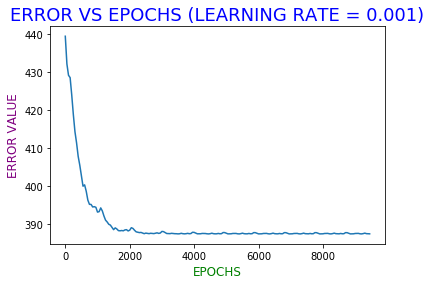

In [28]:
plot1 = plt.figure(1)
plt.title('ERROR VS EPOCHS (LEARNING RATE = 0.001)',fontsize = 18,color = 'blue')
plt.xlabel('EPOCHS',color = 'green',fontsize = 12)
plt.ylabel('ERROR VALUE',color = 'purple',fontsize = 12)
y = error1
x = x=[i*50 for i in range(len(error1))]
plt.plot(x,y)

MODEL EVALUATION


In [29]:
errors = np.array(errors)
print("For the training set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(train_sum_of_squares),np.var(train_sum_of_squares)))
print("For the test set, mean sum of square of errors = {} and variance square of errors = {}".format(np.mean(test_sum_of_squares),np.var(test_sum_of_squares)))
print("For the training set, mean RMSE = {} and variance RMSE = {}".format(np.mean(train_errors),np.var(train_errors)))
print("For the test set, mean RMSE = {} and  variance RMSE = {}".format(np.mean(errors),np.var(errors)))

For the training set, mean sum of square of errors = 413.04202031491195 and variance square of errors = 144.5712547534622
For the test set, mean sum of square of errors = 176.31268681697523 and variance square of errors = 147.68584480578386
For the training set, mean RMSE = 0.9393504729823151 and variance RMSE = 0.00018910838420858707
For the test set, mean RMSE = 0.9360359902945474 and  variance RMSE = 0.0010141712264162988


WEIGHT MATRICES FOR THE 20 MODELS

In [30]:
for index,i in enumerate(weights_list):
  print("Weights of model {} are :".format(index+1),i)

Weights of model 1 are : [[-0.01919413]
 [ 0.28015178]
 [ 0.15646197]
 [ 0.06198921]]
Weights of model 2 are : [[-0.00446937]
 [ 0.26301198]
 [ 0.15822758]
 [ 0.05594674]]
Weights of model 3 are : [[0.00310988]
 [0.27742363]
 [0.19369504]
 [0.02856773]]
Weights of model 4 are : [[-0.04415018]
 [ 0.30668271]
 [ 0.13011685]
 [ 0.06967909]]
Weights of model 5 are : [[-0.01505421]
 [ 0.3179367 ]
 [ 0.13063664]
 [ 0.04107603]]
Weights of model 6 are : [[0.02231834]
 [0.26572595]
 [0.180179  ]
 [0.05791232]]
Weights of model 7 are : [[0.01993868]
 [0.29386227]
 [0.19841796]
 [0.06354201]]
Weights of model 8 are : [[0.01964686]
 [0.27032368]
 [0.19496666]
 [0.01438324]]
Weights of model 9 are : [[-0.03311744]
 [ 0.30067611]
 [ 0.14583926]
 [ 0.04114911]]
Weights of model 10 are : [[0.01163073]
 [0.26452166]
 [0.1718819 ]
 [0.03601782]]
Weights of model 11 are : [[0.00663988]
 [0.28418863]
 [0.17592762]
 [0.0453361 ]]
Weights of model 12 are : [[0.02509243]
 [0.29429146]
 [0.2024688 ]
 [0.0662